In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns 
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import set_config; set_config(display='diagram')
from sklearn.preprocessing import OneHotEncoder
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,precision_score,recall_score

In [7]:
train= pd.read_csv('C:/Users/SIMPLON/Desktop/banc/train.txt', encoding='latin')
test= pd.read_csv('C:/Users/SIMPLON/Desktop/banc/test.txt', encoding='latin')

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [136]:
#statistics of the data
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.00,614.00,592.00,600.00,564.00,614,614
unique,614,2,2,4,2,2,nan,nan,nan,nan,nan,3,2
top,LP001120,Male,Yes,0,Graduate,No,nan,nan,nan,nan,nan,Semiurban,Y
freq,1,489,398,345,480,500,nan,nan,nan,nan,nan,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,"5,403.46","1,621.25",146.41,342.00,0.84,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,"6,109.04","2,926.25",85.59,65.12,0.36,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.00,0.00,9.00,12.00,0.00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,"2,877.50",0.00,100.00,360.00,1.00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,"3,812.50","1,188.50",128.00,360.00,1.00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,"5,795.00","2,297.25",168.00,360.00,1.00,NaN,NaN


In [137]:
train.shape

(614, 13)

In [138]:
train.nunique()/len(train)

Loan_ID             1.00
Gender              0.00
Married             0.00
Dependents          0.01
Education           0.00
Self_Employed       0.00
ApplicantIncome     0.82
CoapplicantIncome   0.47
LoanAmount          0.33
Loan_Amount_Term    0.02
Credit_History      0.00
Property_Area       0.00
Loan_Status         0.00
dtype: float64

In [139]:
train.Gender.value_counts()/len(train.Gender)*100

Male     79.64
Female   18.24
Name: Gender, dtype: float64

<AxesSubplot:ylabel='Gender'>

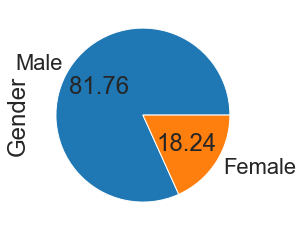

In [224]:
train.Gender.value_counts().plot.pie(autopct='%.2f')

In [226]:
train.Married.value_counts()/len(train.Gender)*100

Yes   65.31
No    34.69
Name: Married, dtype: float64

<AxesSubplot:ylabel='Married'>

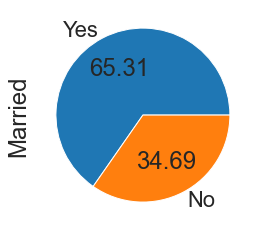

In [223]:
train.Married.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='Education'>

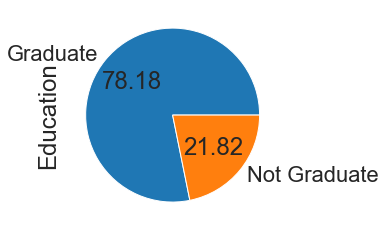

In [227]:
train.Education.value_counts().plot.pie(autopct='%.2f')

In [143]:
train.Dependents.value_counts()/len(train.Gender)*100


0    56.19
1    16.61
2    16.45
3+    8.31
Name: Dependents, dtype: float64

<AxesSubplot:ylabel='Dependents'>

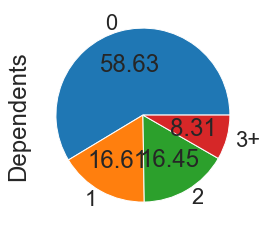

In [222]:
train.Dependents.value_counts().plot.pie(autopct='%.2f')

In [145]:
train.Self_Employed.value_counts()/len(train.Gender)*100


No    81.43
Yes   13.36
Name: Self_Employed, dtype: float64

In [146]:
train.Property_Area.value_counts()/len(train.Gender)*100

Semiurban   37.95
Urban       32.90
Rural       29.15
Name: Property_Area, dtype: float64

In [147]:
train.duplicated().sum() 

0

In [148]:
# target
train.Loan_Status.value_counts()/len(train.Gender)*100

Y   68.73
N   31.27
Name: Loan_Status, dtype: float64

<AxesSubplot:ylabel='Loan_Status'>

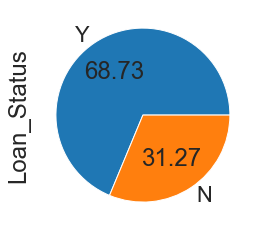

In [149]:
train.Loan_Status.value_counts().plot.pie(autopct='%.2f')

In [150]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [151]:
#data n'est pas balancées
# delate Loan_ID
train=train.drop(['Loan_ID'],axis=1)

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

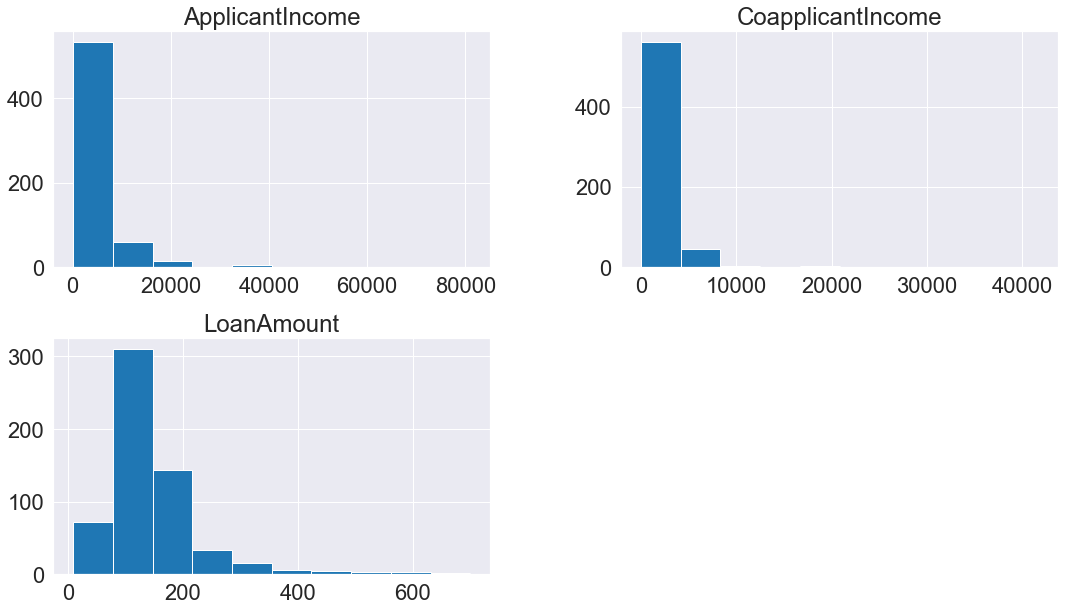

In [152]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
train.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

In [153]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

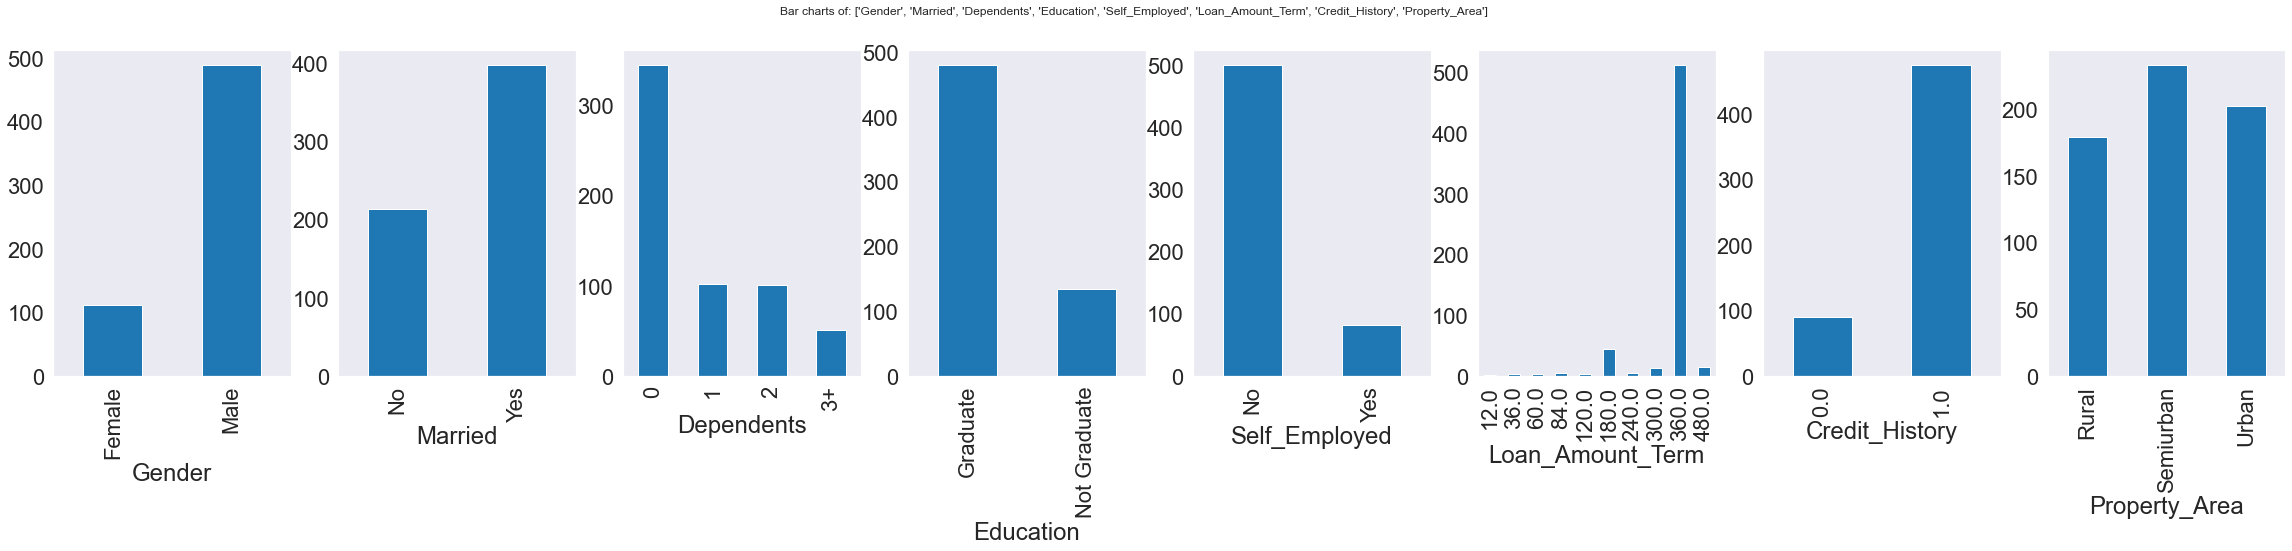

In [154]:
# Calling the function
PlotBarCharts(inpData=train, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [155]:
# Finding nearest values to 30000 mark
train['ApplicantIncome'][train['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

In [156]:
#23803 le valeur le plus logique , on va remplacer tt les valeurs >30000 par 23803

In [157]:
# Replacing outliers with nearest possibe value
train['ApplicantIncome'][train['ApplicantIncome']>30000] = 23803

<ipython-input-157-98a6a9d4bd01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ApplicantIncome'][train['ApplicantIncome']>30000] = 23803


In [158]:
# Finding nearest values to 15000 mark
train['CoapplicantIncome'][train['CoapplicantIncome']>10000].sort_values()

9     10,968.00
177   11,300.00
402   20,000.00
417   20,000.00
581   33,837.00
600   41,667.00
Name: CoapplicantIncome, dtype: float64

In [159]:
# Replacing outliers with 11300
train['CoapplicantIncome'][train['CoapplicantIncome']>15000] = 11300

<ipython-input-159-6fac7d15cf33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['CoapplicantIncome'][train['CoapplicantIncome']>15000] = 11300


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

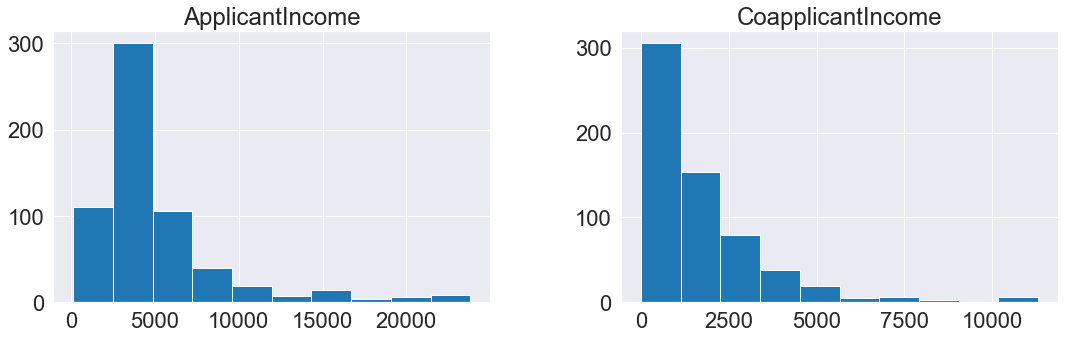

In [160]:
#Visualizing distribution after outlier treatment
train.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

In [161]:
#missing values
pd.options.display.float_format = '{:,.2f}'.format
df_missing_val = pd.DataFrame(columns=['column','number of missing values'])
for column in train.columns: 
    missing_val = train[column].isnull().sum()
    x = {'column':column,'number of missing values':missing_val}
    df_missing_val = df_missing_val.append(x,ignore_index=True)
    

df_missing_val = df_missing_val[df_missing_val['number of missing values']!=0]
df_missing_val['number of missing values'] = df_missing_val['number of missing values'].astype(int)
df_missing_val = df_missing_val.sort_values(by='number of missing values',ascending=False)

df_missing_val

,column,number of missing values
9,Credit_History,50
4,Self_Employed,32
7,LoanAmount,22
2,Dependents,15
8,Loan_Amount_Term,14
0,Gender,13
1,Married,3


In [162]:
# Imputing the missing values
# Using MODE for categorical columns
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [163]:
# Checking missing values again after the treatment
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

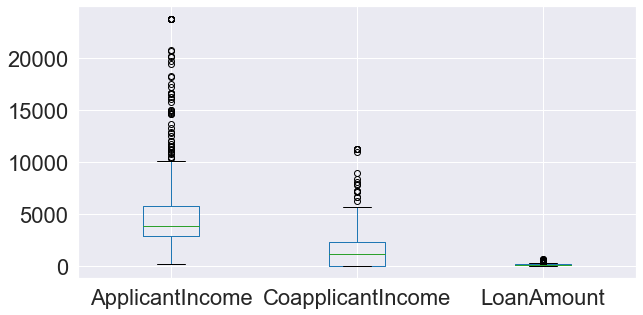

In [164]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount']].boxplot(figsize=(10,5))

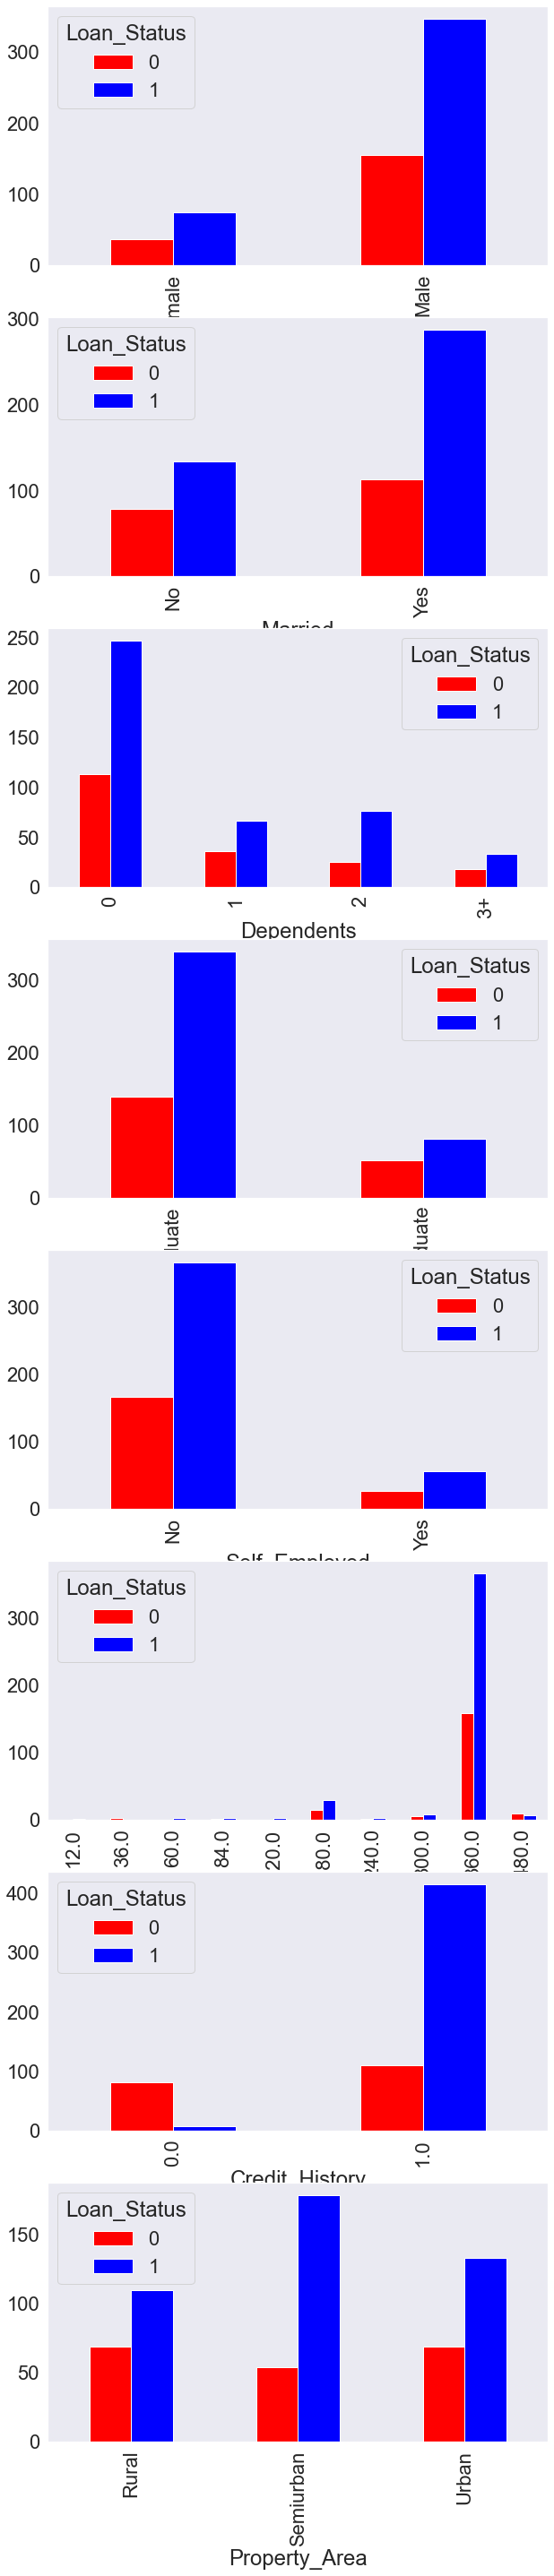

In [229]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=train[CategoricalCol], columns=train['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

Text(0.5, 1.0, 'Correlation Heatmap for features with highest correlations with target variables')

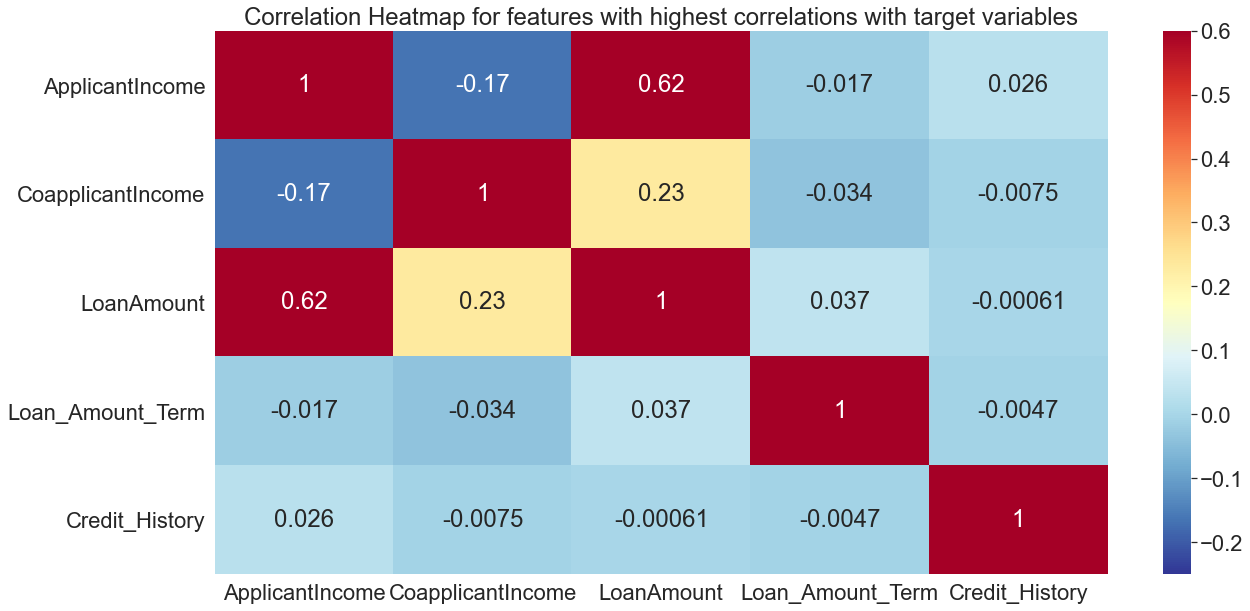

In [166]:
#corr entre les variables continues
import matplotlib.pyplot as plt
most_corr=train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Correlation Heatmap for features with highest correlations with target variables')

In [167]:
#il y a une correlation entre ApplicantIncome et LoanAmount
#corr entre les variables continues et le target
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [168]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
FunctionAnova(inpData=train,TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6651120750168427
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.41132365467797827
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.5770667590787362
Credit_History is correlated with Loan_Status | P-Value: 7.01968203203062e-48


['Credit_History']

In [169]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [170]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=train, 
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Loan_Status | P-Value: 0.9710746411403309
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.13058516348934335
Credit_History is correlated with Loan_Status | P-Value: 3.4183499979091188e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

In [171]:
train['Credit_History']=train['Credit_History'].astype('O')

In [172]:
train.shape

(614, 12)

In [173]:
train['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

In [174]:
X=train[['Married', 'Education', 'Credit_History', 'Property_Area']]
y=train[['Loan_Status']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 2022,stratify=y)

In [175]:
num_columns = X.columns[X.dtypes != 'object']
cat_columns = X.columns[X.dtypes == 'object']

In [176]:
num_columns 


Index([], dtype='object')

In [177]:
cat_columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object')

In [178]:
#pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [179]:
numeric_transformer = Pipeline(steps=[
   ('scaler',MinMaxScaler()),])

In [180]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer,num_columns ),
        ('cat', categorical_transformer,cat_columns)
    ]
)

In [181]:
#pd.DataFrame(preprocessor.fit_transform(X_train))


In [184]:
logreg_pipe = Pipeline([
        ('transformer', preprocessor),
        ('classifier', LogisticRegression()),
    ])

logreg_pipe.fit(X_train,y_train)


C:\Users\SIMPLON\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [185]:
logreg_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'classifier', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__num', 'transformer__cat', 'transformer__num__memory', 'transformer__num__steps', 'transformer__num__verbose', 'transformer__num__scaler', 'transformer__num__scaler__clip', 'transformer__num__scaler__copy', 'transformer__num__scaler__feature_range', 'transformer__cat__memory', 'transformer__cat__steps', 'transformer__cat__verbose', 'transformer__cat__onehot', 'transformer__cat__onehot__categories', 'transformer__cat__onehot__drop', 'transformer__cat__onehot__dtype', 'transformer__cat__onehot__handle_unknown', 'transformer__cat__onehot__sparse', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classifier__intercept_scaling', 'classifier__l1_ratio', 'c

In [190]:
#params de grid
grid={"classifier__C":np.logspace(-3,3,7),
      "classifier__penalty":["l1","l2", 'elasticnet']}# l1 lasso l2 ridge


In [191]:
#grid search 
logreg_cv=GridSearchCV(logreg_pipe,grid,cv=5, verbose = 1, n_jobs = -1)

In [192]:
logreg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


C:\Users\SIMPLON\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SIMPLON\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SIMPLON\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\SIMPLON\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object'))])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'classifier__penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [189]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
accuracy : 0.8065217391304348


In [193]:
model_logreg=logreg_cv.best_estimator_
model_logreg

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object'))])),
                ('classifier', LogisticRegression(C=0.1))])

In [194]:
y_pred_log=model_logreg.predict(X_test)


In [203]:
print('Accuracy: ', accuracy_score(y_test, y_pred_log))
print('Precision: ', precision_score(y_test,y_pred_log))
print('Recall: ', recall_score(y_test, y_pred_log))
print('f1-score: ', f1_score(y_test,y_pred_log))


Accuracy:  0.8181818181818182
Precision:  0.8
Recall:  0.9811320754716981
f1-score:  0.8813559322033898


In [198]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))


              precision    recall  f1-score   support

           0       0.92      0.46      0.61        48
           1       0.80      0.98      0.88       106

    accuracy                           0.82       154
   macro avg       0.86      0.72      0.75       154
weighted avg       0.84      0.82      0.80       154

[[ 22  26]
 [  2 104]]


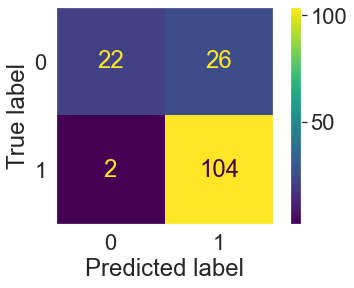

In [199]:
cfm=confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=model_logreg.classes_)
disp.plot() 

# RandomForestClassifier

In [213]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline(
    [
       ('preprocessing', preprocessor),
        ("clf", RandomForestClassifier()),
    ]
)
rf_pipeline.fit(X_train, y_train)
#rf_pipeline.get_params()

C:\Users\SIMPLON\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object'))])),
                ('clf', RandomForestClassifier())])

In [212]:
rf_params = {
 'clf__bootstrap': [True, False],
 'clf__max_features':['auto', 'sqrt'],
 'clf__max_depth': [50,100, None],
 'clf__min_samples_split':[1, 2, 4],
 'clf__min_samples_split': [100],
 'clf__n_estimators':[1000,2000]

}

In [214]:
rf_gs = GridSearchCV(rf_pipeline , param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1)

In [215]:
rf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\SIMPLON\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object'))])),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__bootstrap': [True, False],
                         'clf__max_depth': [50, 100, None],
                         'clf__max_features': ['auto', 'sqrt'],
                         'clf__min_samples_split': [100],
                         'clf__n_estimators': [1000, 2000]},
             verbose=1)

In [216]:
print("tuned hpyerparameters :(best parameters) ",rf_gs.best_params_)
print("accuracy :",rf_gs.best_score_)

tuned hpyerparameters :(best parameters)  {'clf__bootstrap': True, 'clf__max_depth': 50, 'clf__max_features': 'auto', 'clf__min_samples_split': 100, 'clf__n_estimators': 1000}
accuracy : 0.8065217391304348


In [217]:
model_rf=rf_gs.best_estimator_
model_rf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object'))])),
                ('clf',
                 RandomForestClassifier(max_depth=50, min_samples_split=100,
                                        n_estimators=1000))])

In [218]:
y_pred_rf=model_rf.predict(X_test)

In [219]:
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test,y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))
print('f1-score: ', f1_score(y_test,y_pred_rf))

Accuracy:  0.8181818181818182
Precision:  0.8
Recall:  0.9811320754716981
f1-score:  0.8813559322033898


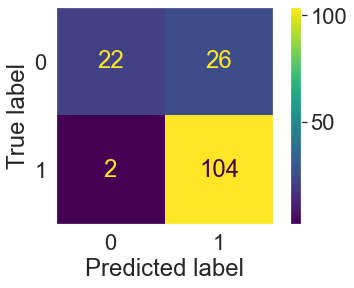

In [221]:
cfm=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=model_rf.classes_)
disp.plot() 

# smote